In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
from multiple_contexts import renewal
from extn_rw_models import *
from plotnine import *

In [2]:
model = refined
save_plots = True
perform_oat = False
print(model.pars)

par_vals = {'refined': [0.001, 0.01, 0.5, 5.0]}

            min   max  default
drate       0.0   0.5     0.25
lrate_min   0.0   0.5     0.10
power       0.0   2.0     0.50
resp_scale  0.0  10.0     1.00


In [3]:
if perform_oat:
    oat_result = sr.perform_oat(experiment = renewal,
                                model = model,
                                minimize = True,
                                n = 1)
    print(np.round(oat_result[0], 4))
    print(np.round(oat_result[1], 4))

In [4]:
print('renewal after extinction in multiple contexts \n')

trials = renewal.make_trials('three_contexts')
ds3 = model.simulate(trials, par_vals[model.name])

trials = renewal.make_trials('one_context')
ds1 = model.simulate(trials, par_vals[model.name])

print(renewal.oats['one_vs_three'].compute_total({'three_contexts': ds3, 'one_context': ds1}))
print(renewal.oats['one_vs_three'].mean_resp({'three_contexts': ds3, 'one_context': ds1}))

renewal after extinction in multiple contexts 

0.03724999361683301
         schedule     trial_name u_name  mean_resp
0     one_context  cs -> nothing     us   0.615482
0  three_contexts  cs -> nothing     us   0.578232


/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_renewal_multiple_contexts_b_refined.jpeg


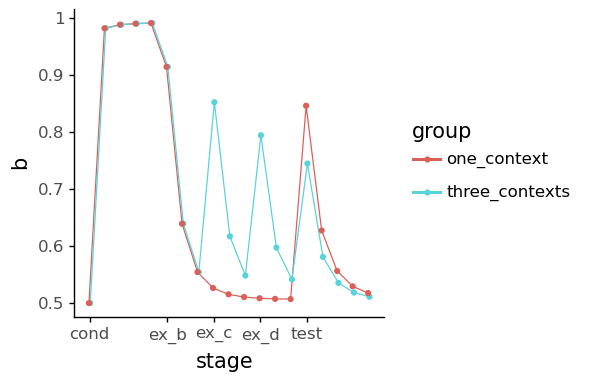

In [5]:
plot_b = sr.multi_plot(ds_list = [ds3, ds1],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       only_main = True,
                       draw_points = True)
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/rw_renewal_multiple_contexts_b_' + model.name + '.jpeg', dpi = 300)

/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_renewal_multiple_contexts_w_elem_refined.jpeg


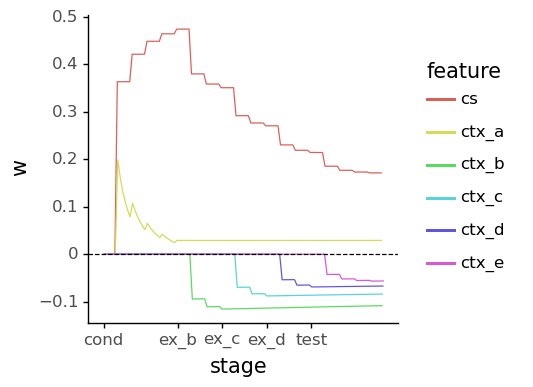

In [6]:
plot_w_elem = sr.learn_plot(ds3,
                            var = 'w',
                            rename_coords = {'f_name': 'feature'},
                            sel = {'f_name': ['cs', 'ctx_a', 'ctx_b', 'ctx_c', 'ctx_d', 'ctx_e']})
plot_w_elem += geom_hline(yintercept = 0, linetype = "dashed")
plot_w_elem.draw()
if save_plots:
    plot_w_elem.save(filename = 'plots/rw_renewal_multiple_contexts_w_elem_' + model.name + '.jpeg', dpi = 300)

/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_renewal_multiple_contexts_w_cfg_refined.jpeg


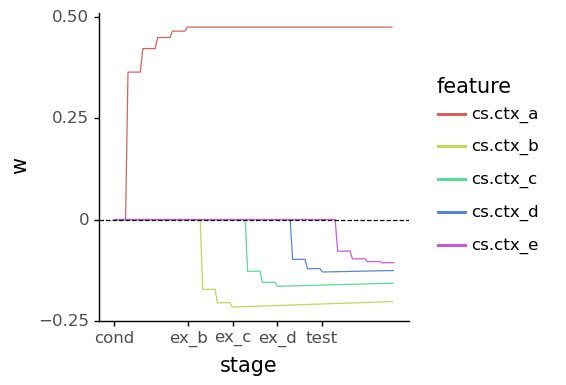

In [7]:
plot_w_cfg = sr.learn_plot(ds3,
                           var = 'w',
                           rename_coords = {'f_name': 'feature'},
                           sel = {'f_name': ['cs.ctx_a', 'cs.ctx_b', 'cs.ctx_c', 'cs.ctx_d', 'cs.ctx_e']})
plot_w_cfg += geom_hline(yintercept = 0, linetype = "dashed")
plot_w_cfg.draw()
if save_plots:
    plot_w_cfg.save(filename = 'plots/rw_renewal_multiple_contexts_w_cfg_' + model.name + '.jpeg', dpi = 300)